# Tutorial - Decision Tree 

Decision trees are a common and powerful prediction approach.

They are popular because the final model is so easy to understand. The final decision tree can explain why a specific prediction was made, making it attractive for use. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. More complex ensemble approaches like random forests are built on top of decision trees.

In this tutorial, we will learn how to create a Classification Tree.

1. Import necessary libraries.
2. Import datset and view its shape.
3. Define the feature attribute and target attribute.
4. Spliting the dataset 80% for training, and 20% for testing the classifier.
5. Using entropy and gini index to measure the quality of a split and fit the data.
6. Making predictions on test data.
7. Calculating accuracy.
8. Calculating the confusion matrix.
9. Decision tree visualization.

In [18]:
#Importing necessary libraries 

import pandas as pd  

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
# import the dataset

data = pd.read_csv("wine.csv")
# checking the dimensions of the data
print(data.shape)
# To see first 5 rows of the dataset
#data.head()

(178, 14)


In [20]:
# columns present in the dataset
data.columns 

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [21]:
# define the feature as well as the target datasets / columns
feature_col = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 
               'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
features = data[feature_col]
label = data.Customer_Segment

In [22]:
# Split the given data into 80 percent training data and 20 percent testing data
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [23]:
#Fit the given data
model_tree = DecisionTreeClassifier(criterion = 'entropy')
model_tree = model_tree.fit(x_train, y_train)

In [24]:
#Make prediction on the test data
ypred_entropy = model_tree.predict(x_test)

In [25]:
# percentage of accuracy
print(metrics.accuracy_score(y_test, ypred_entropy))

0.9166666666666666


In [26]:
# confusion matrix
print(metrics.confusion_matrix(y_test, ypred_entropy))

[[12  2  0]
 [ 0 11  1]
 [ 0  0 10]]


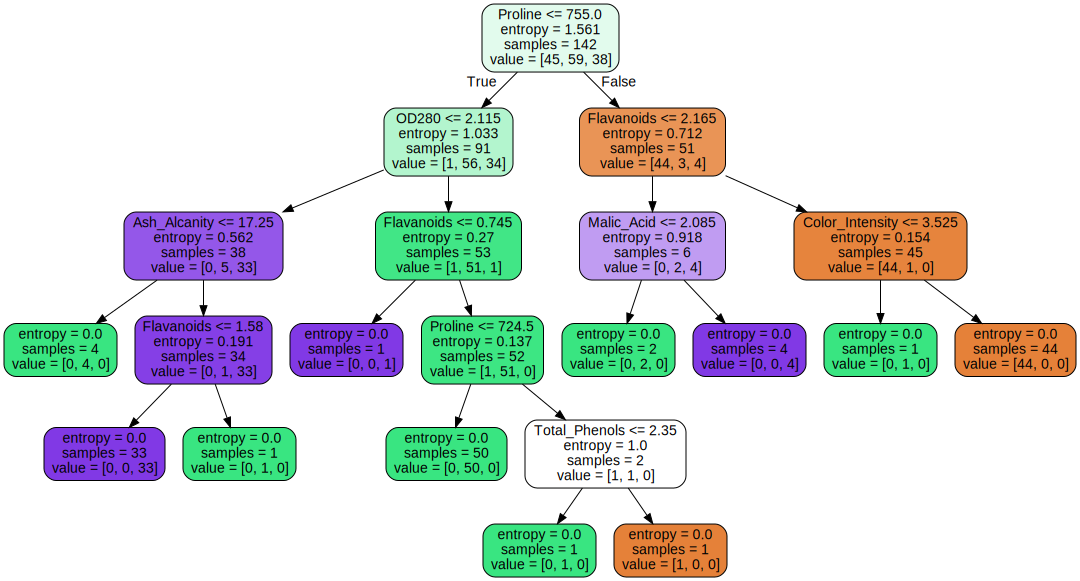

In [27]:
# to visualize the decision tree

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model_tree, feature_names=feature_col, filled=True, rounded=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

0.8611111111111112
[[10  4  0]
 [ 0 12  0]
 [ 0  1  9]]


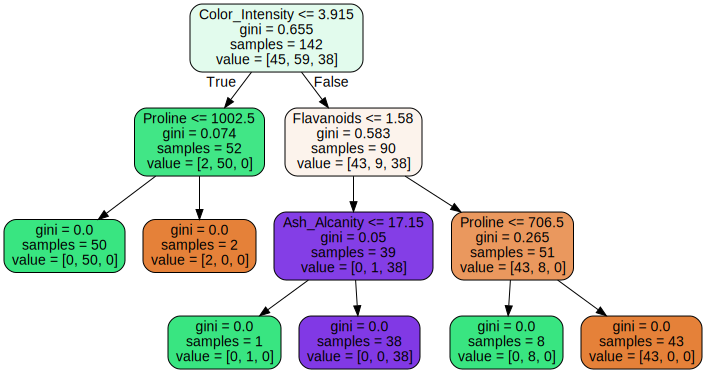

In [28]:
# Using gini index

#Fit the given data
tree1 = DecisionTreeClassifier()
tree1 = tree1.fit(x_train, y_train)

#Make prediction on the test data
ypred_gini = tree1.predict(x_test)

# percentage of accuracy
print(metrics.accuracy_score(y_test, ypred_gini))
#print(f'accuracy obtained is {metrics.accuracy_score(y_test, ypred_gini)*100:.2f}%')

# confusion matrix
print(metrics.confusion_matrix(y_test, ypred_gini))

# to visualize the decision tree
import graphviz
dot_data = tree.export_graphviz(tree1, feature_names=feature_col, filled=True, rounded=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Decision Tree Regressor

In [29]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

In [30]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["target"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeRegressor(criterion = 'mse', max_depth = 3)
model = model.fit(X_train, y_train)

In [31]:
y_pred = model.predict(X_test)
print(metrics.r2_score(y_test, y_pred))

0.8021990752059437


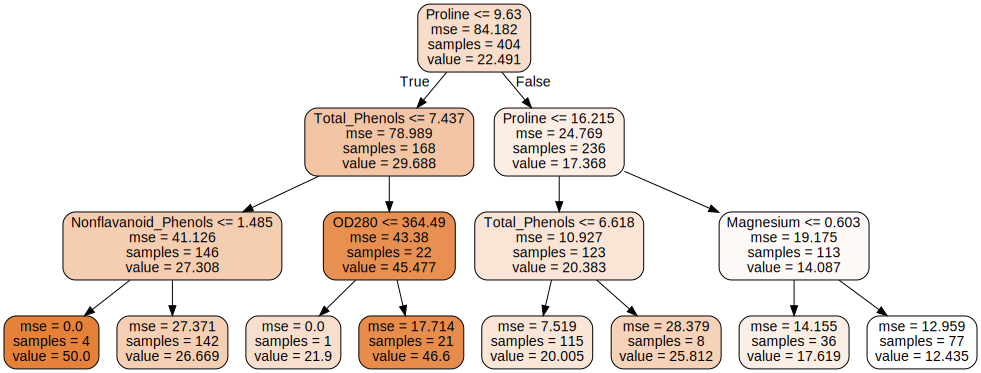

In [32]:
import graphviz
dot_data = tree.export_graphviz(model, feature_names=feature_col, filled=True, rounded=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [16]:
# https://scikit-learn.org/stable/datasets.html (list of availbale sklean dataset)

In [17]:
# https://scikit-learn.org/stable/modules/tree.html (Decision tree )